# Libraries

In [1]:
# default libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
import time
import math

In [2]:
# plotting configuration
sns.set(style = 'darkgrid',
        font_scale = 1.4,
        rc = {"lines.linewidth": 2,
          "figure.figsize": (12, 8)})

sns.set_palette('Set2')

In [3]:
from tools import get_exponential_bins, compute_quantile_hist_data, compute_interval_score
from data_gen import generate_raw_data,get_binned_data_cookie_bucket_level
from hyp_tests import percentile_bootstrap_ci_ratio_cookie_buckets
from hyp_tests import bc_a_bootstrap_ratio_cookie_buckets
from hyp_tests import jackknife_cookie_bucket_quantile_bucketed
from data_gen import generate_raw_data_lognormal
from data_gen import generate_raw_data_exponential
from data_gen import generate_data_mixture_exp_bucket_level

# Simulations

In [91]:
datasets=generate_data_mixture_exp_bucket_level([200,200],[100,800],[0.8,0.2],20,bins_boundaries)

In [4]:
bins_boundaries= get_exponential_bins(10,600000,100)
num_of_cookie_buckets=20

## Median

In [5]:
num_of_cookie_buckets = [10,20,30,40,50,60,70,80,90,100]

In [153]:
varying_res_percentile_50=list()
varying_res_bc_a_50=list()
varying_res_jack_50=list()

varying_length_percentile_50=list()
varying_length_bc_a_50=list()
varying_length_jack_50=list()

varying_int_score_percentile_50=list()
varying_int_score_bc_a_50=list()
varying_int_score_jack_50=list()

agreed_jack_bc_a_50 = list()
agreed_jack_percentile_50 = list()
agreed_bc_a_percentile_50 = list()
agreed_all_three_50 = list()

timing_percentile_50 = list()
timing_jack_50 = list()
timing_bca_50=list()

In [154]:
for cur_num_of_cookie_buckets in num_of_cookie_buckets:
    varying_res_percentile_50+=[[]]
    varying_res_bc_a_50+=[[]]
    varying_res_jack_50+=[[]]

    varying_length_percentile_50+=[[]]
    varying_length_bc_a_50+=[[]]
    varying_length_jack_50+=[[]]

    varying_int_score_percentile_50+=[[]]
    varying_int_score_bc_a_50+=[[]]
    varying_int_score_jack_50+=[[]]

    agreed_jack_bc_a_50 +=[[]]
    agreed_jack_percentile_50+=[[]]
    agreed_bc_a_percentile_50 +=[[]]
    agreed_all_three_50 +=[[]]

    timing_bca_50 +=[[]]
    timing_percentile_50 +=[[]]
    timing_jack_50 +=[[]]


In [155]:
num_of_sims=1000

In [156]:
for i in range(num_of_sims):

    for cur_ind, cur_num_of_cookie_buckets in enumerate(num_of_cookie_buckets):
        # generate bucketed data
        dataset_treat, dataset_control=generate_data_mixture_exp_bucket_level([1000,1000],[300,600],[0.1,0.9],cur_num_of_cookie_buckets,bins_boundaries)

        # bin raw data and place the clients into cookie buckets
        bucketed_data_treat = pd.DataFrame(dataset_treat)
        bucketed_data_control = pd.DataFrame(dataset_control)

        start_time=time.time()
        res_percentile = percentile_bootstrap_ci_ratio_cookie_buckets(bucketed_data_treat, bucketed_data_control,
                                            bins_boundaries, 1000, 0.95,
                                            estimator_type='quantile',
                                            quantile=0.5, return_interval=True)

        timing_percentile_50[cur_ind]+=[time.time()-start_time]

        start_time=time.time()
        res_bc_a = bc_a_bootstrap_ratio_cookie_buckets(bucketed_data_treat, bucketed_data_control,
                                            bins_boundaries, 1000, 0.95,
                                            estimator_type='quantile',
                                            quantile=0.5, return_interval=True)
        
        timing_bca_50[cur_ind]+=[time.time()-start_time]

        start_time=time.time()
        res_jack = jackknife_cookie_bucket_quantile_bucketed(bucketed_data_treat, bucketed_data_control,
                                            bins_boundaries, 0.95,
                                            quantile_to_test= 0.5, return_interval=True)

        timing_jack_50[cur_ind]+=[time.time()-start_time]
        # add coverage result
        varying_res_percentile_50[cur_ind]+=[res_percentile[0]]
        varying_res_bc_a_50[cur_ind]+=[res_bc_a[0]]
        varying_res_jack_50[cur_ind]+=[res_jack[0]]

        #add length
        varying_length_percentile_50[cur_ind]+=[res_percentile[1][1]-res_percentile[1][0]]
        varying_length_bc_a_50[cur_ind]+=[res_bc_a[1][1]-res_bc_a[1][0]]
        varying_length_jack_50[cur_ind]+=[res_jack[1][1]-res_jack[1][0]]

        #add scores
        varying_int_score_percentile_50[cur_ind]+=[compute_interval_score(res_percentile[1][1],res_percentile[1][0],1-0.95,0)]
        varying_int_score_bc_a_50[cur_ind]+=[compute_interval_score(res_bc_a[1][1],res_bc_a[1][0],1-0.95,0)]
        varying_int_score_jack_50[cur_ind]+=[compute_interval_score(res_jack[1][1],res_jack[1][0],1-0.95,0)]

        agreed_bc_a_percentile_50[cur_ind]+=[res_bc_a[0]==res_percentile[0]]
        agreed_jack_bc_a_50[cur_ind]+=[res_jack[0]==res_bc_a[0]]
        agreed_jack_percentile_50[cur_ind]+=[res_jack[0]==res_percentile[0]]
        agreed_all_three_50[cur_ind]+=[res_jack[0]==res_percentile[0] == res_bc_a[0]]


In [157]:
aver_rej_rate_percentile_50 = np.array([np.mean(cur_sample) for cur_sample in varying_res_percentile_50])
aver_rej_rate_bca_50 = np.array([np.mean(cur_sample) for cur_sample in varying_res_bc_a_50])
aver_rej_rate_jack_50 = np.array([np.mean(cur_sample) for cur_sample in varying_res_jack_50])

aver_length_percentile_50 = np.array([np.mean(cur_sample) for cur_sample in varying_length_percentile_50])
aver_length_bca_50 = np.array([np.mean(cur_sample) for cur_sample in varying_length_bc_a_50])
aver_length_jack_50 = np.array([np.mean(cur_sample) for cur_sample in varying_length_jack_50])

aver_int_score_percentile_50 = np.array([np.mean(cur_sample) for cur_sample in varying_int_score_percentile_50])
aver_int_score_bca_50 = np.array([np.mean(cur_sample) for cur_sample in varying_int_score_bc_a_50])
aver_int_score_jack_50 = np.array([np.mean(cur_sample) for cur_sample in varying_int_score_jack_50])

aver_agreed_jack_bca_50 = np.array([np.mean(cur_sample) for cur_sample in agreed_jack_bc_a_50])
aver_agreed_jack_percentile_50 = np.array([np.mean(cur_sample) for cur_sample in agreed_jack_percentile_50])
aver_agreed_bca_percentile_50 = np.array([np.mean(cur_sample) for cur_sample in agreed_bc_a_percentile_50])
aver_agreed_all_three_50 = np.array([np.mean(cur_sample) for cur_sample in agreed_all_three_50])

aver_timing_percentile_50 = np.array([np.mean(cur_sample) for cur_sample in timing_percentile_50])
aver_timing_bca_50 = np.array([np.mean(cur_sample) for cur_sample in timing_bca_50])
aver_timing_jack_50 = np.array([np.mean(cur_sample) for cur_sample in timing_jack_50])

In [158]:
std_aver_rej_rate_percentile_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in varying_res_percentile_50])
std_aver_rej_rate_bca_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in varying_res_bc_a_50])
std_aver_rej_rate_jack_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in varying_res_jack_50])

std_aver_length_percentile_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in varying_length_percentile_50])
std_aver_length_bca_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in varying_length_bc_a_50])
std_aver_length_jack_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in varying_length_jack_50])

std_aver_int_score_percentile_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in varying_int_score_percentile_50])
std_aver_int_score_bca_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in varying_int_score_bc_a_50])
std_aver_int_score_jack_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in varying_int_score_jack_50])

std_aver_agreed_jack_bca_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in agreed_jack_bc_a_50])
std_aver_agreed_jack_percentile_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in agreed_jack_percentile_50])
std_aver_agreed_bca_percentile_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in agreed_bc_a_percentile_50])
std_aver_agreed_all_three_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in agreed_all_three_50])

std_aver_timing_percentile_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in timing_percentile_50])
std_aver_timing_bca_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in timing_bca_50])
std_aver_timing_jack_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in timing_jack_50])

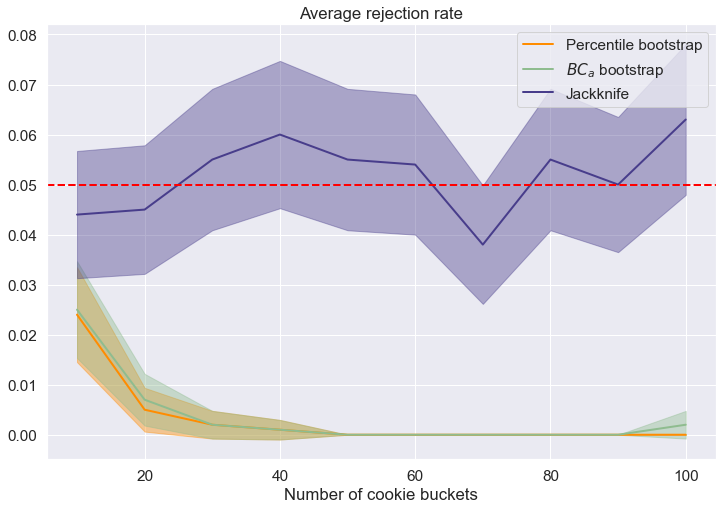

In [159]:
plt.plot(num_of_cookie_buckets, aver_rej_rate_percentile_50, c='DarkOrange', label='Percentile bootstrap')
plt.plot(num_of_cookie_buckets, aver_rej_rate_bca_50,  c='DarkSeaGreen', label='$BC_a$ bootstrap')
plt.plot(num_of_cookie_buckets, aver_rej_rate_jack_50,c='darkslateblue', label='Jackknife')

plt.fill_between(num_of_cookie_buckets,aver_rej_rate_percentile_50 - 1.96 * std_aver_rej_rate_percentile_50,
    aver_rej_rate_percentile_50 + 1.96*std_aver_rej_rate_percentile_50, color='DarkOrange', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,aver_rej_rate_bca_50 - 1.96 * std_aver_rej_rate_bca_50,
    aver_rej_rate_bca_50 + 1.96*std_aver_rej_rate_bca_50, color='DarkSeaGreen', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,aver_rej_rate_jack_50 - 1.96 * std_aver_rej_rate_jack_50,
    aver_rej_rate_jack_50 + 1.96*std_aver_rej_rate_jack_50, color='darkslateblue', alpha=0.4)

plt.axhline(0.05, color='red', linestyle='dashed')
plt.title('Average rejection rate')
plt.xlabel('Number of cookie buckets')
plt.legend()
plt.show()

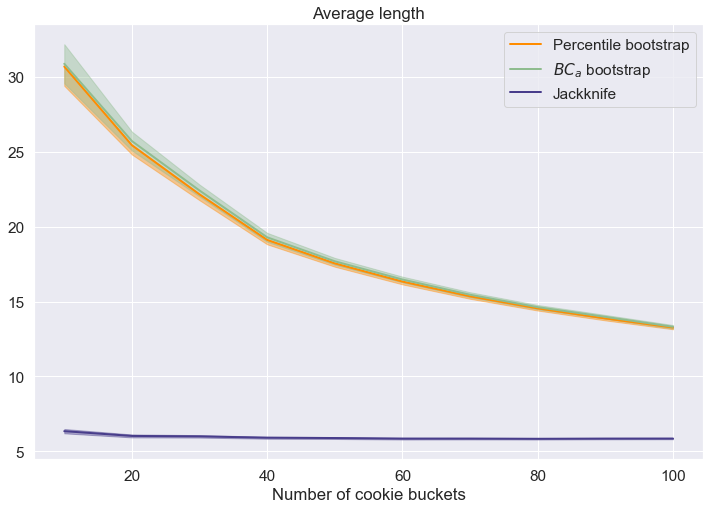

In [160]:
plt.plot(num_of_cookie_buckets, aver_length_percentile_50, c='DarkOrange', label='Percentile bootstrap')
plt.plot(num_of_cookie_buckets, aver_length_bca_50,  c='DarkSeaGreen', label='$BC_a$ bootstrap')
plt.plot(num_of_cookie_buckets, aver_length_jack_50,c='darkslateblue', label='Jackknife')

plt.fill_between(num_of_cookie_buckets,aver_length_percentile_50 - 1.96 * std_aver_length_percentile_50,
    aver_length_percentile_50 + 1.96*std_aver_length_percentile_50, color='DarkOrange', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,aver_length_bca_50 - 1.96 * std_aver_length_bca_50,
    aver_length_bca_50 + 1.96*std_aver_length_bca_50, color='DarkSeaGreen', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,aver_length_jack_50 - 1.96 * std_aver_length_jack_50,
    aver_length_jack_50 + 1.96*std_aver_length_jack_50, color='darkslateblue', alpha=0.4)

plt.title('Average length')
plt.xlabel('Number of cookie buckets')
plt.legend()
plt.show()

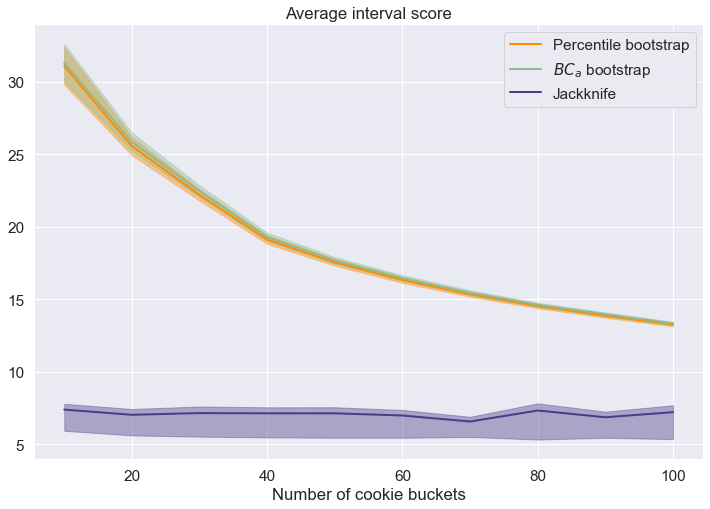

In [161]:
plt.plot(num_of_cookie_buckets, aver_int_score_percentile_50, c='DarkOrange', label='Percentile bootstrap')
plt.plot(num_of_cookie_buckets, aver_int_score_bca_50,  c='DarkSeaGreen', label='$BC_a$ bootstrap')
plt.plot(num_of_cookie_buckets, aver_int_score_jack_50,c='darkslateblue', label='Jackknife')

plt.fill_between(num_of_cookie_buckets,aver_int_score_percentile_50 - 1.96 * std_aver_int_score_percentile_50,
    aver_int_score_percentile_50 + 1.96*std_aver_int_score_percentile_50, color='DarkOrange', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,aver_int_score_bca_50 - 1.96 * std_aver_int_score_bca_50,
    aver_int_score_bca_50 + 1.96*std_aver_int_score_bca_50, color='DarkSeaGreen', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,aver_length_jack_50 - 1.96 * std_aver_int_score_jack_50,
    aver_int_score_jack_50 + 1.96*std_aver_int_score_jack_50, color='darkslateblue', alpha=0.4)

plt.title('Average interval score')
plt.xlabel('Number of cookie buckets')
plt.legend()
plt.show()

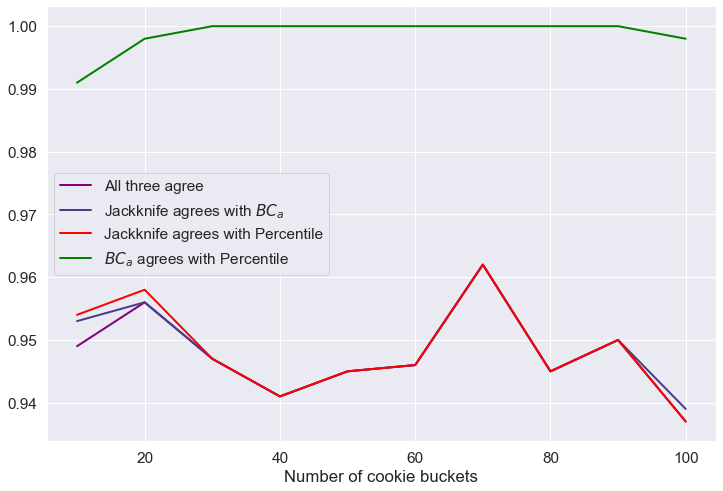

In [199]:
plt.plot(num_of_cookie_buckets, aver_agreed_all_three_50, c='purple', label='All three agree')
plt.plot(num_of_cookie_buckets, aver_agreed_jack_bca_50, c='darkslateblue', label='Jackknife agrees with $BC_a$')
plt.plot(num_of_cookie_buckets, aver_agreed_jack_percentile_50, c='red', label='Jackknife agrees with Percentile')
plt.plot(num_of_cookie_buckets, aver_agreed_bca_percentile_50, c='green', label='$BC_a$ agrees with Percentile')
plt.xlabel('Number of cookie buckets')
plt.legend()
plt.show()

In [171]:
bin_midpoints = [(bins_boundaries[i]+bins_boundaries[i+1]) for i in range(len(bins_boundaries)-1)]

In [195]:
for i in range(20):
    print(compute_mean_hist_data(dataset_treat[i],bins_tuples))

592.9727564102565
564.8590909090909
520.2486338797814
551.3132352941177
589.5543831168832
594.1769041769041
276.484496124031
596.957191780822
577.9
585.3640897755611
618.6860068259385
611.015873015873
580.7987012987013
568.7821428571428
570.7736625514403
570.751724137931
595.9257142857143
568.6154970760234
551.2875536480686
588.6503164556962


In [179]:
bins_tuples = [(bins_boundaries[i],bins_boundaries[i+1]) for i in range(len(bins_boundaries)-1)]

In [196]:
for i in range(20):
    print(compute_mean_hist_data(dataset_control[i],bins_tuples))

616.119696969697
579.0833333333334
575.8148148148148
650.8238095238095
576.6612529002321
584.7557755775578
293.52713178294573
587.7582582582583
633.7936170212766
624.6592741935484
613.441647597254
524.0245901639345
644.8666666666667
651.4975786924939
556.5546448087432
579.2993730407524
599.6086956521739
627.1614785992218
670.6062091503268
629.3008658008658


## Single corrupted cookie bucket

### Median

In [7]:
from data_gen import generate_data_single_corrupted_exp_bucket_level

In [23]:
one_cor_varying_res_percentile_50=list()
one_cor_varying_res_bc_a_50=list()
one_cor_varying_res_jack_50=list()

one_cor_varying_length_percentile_50=list()
one_cor_varying_length_bc_a_50=list()
one_cor_varying_length_jack_50=list()

one_cor_varying_int_score_percentile_50=list()
one_cor_varying_int_score_bc_a_50=list()
one_cor_varying_int_score_jack_50=list()

one_cor_agreed_jack_bc_a_50 = list()
one_cor_agreed_jack_percentile_50 = list()
one_cor_agreed_bc_a_percentile_50 = list()
one_cor_agreed_all_three_50 = list()

one_cor_timing_percentile_50 = list()
one_cor_timing_jack_50 = list()
one_cor_timing_bca_50=list()

for cur_num_of_cookie_buckets in num_of_cookie_buckets:
    one_cor_varying_res_percentile_50+=[[]]
    one_cor_varying_res_bc_a_50+=[[]]
    one_cor_varying_res_jack_50+=[[]]

    one_cor_varying_length_percentile_50+=[[]]
    one_cor_varying_length_bc_a_50+=[[]]
    one_cor_varying_length_jack_50+=[[]]

    one_cor_varying_int_score_percentile_50+=[[]]
    one_cor_varying_int_score_bc_a_50+=[[]]
    one_cor_varying_int_score_jack_50+=[[]]

    one_cor_agreed_jack_bc_a_50 +=[[]]
    one_cor_agreed_jack_percentile_50+=[[]]
    one_cor_agreed_bc_a_percentile_50 +=[[]]
    one_cor_agreed_all_three_50 +=[[]]

    one_cor_timing_bca_50 +=[[]]
    one_cor_timing_percentile_50 +=[[]]
    one_cor_timing_jack_50 +=[[]]


In [24]:
num_of_cookie_buckets

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [25]:
num_of_sims=1000

In [26]:
for i in range(num_of_sims):

    for cur_ind, cur_num_of_cookie_buckets in enumerate(num_of_cookie_buckets):
        # generate bucketed data
        dataset_treat, dataset_control=generate_data_single_corrupted_exp_bucket_level([1000,1000],[600,300],cur_num_of_cookie_buckets,bins_boundaries)

        # bin raw data and place the clients into cookie buckets
        bucketed_data_treat = pd.DataFrame(dataset_treat)
        bucketed_data_control = pd.DataFrame(dataset_control)

        start_time=time.time()
        res_percentile = percentile_bootstrap_ci_ratio_cookie_buckets(bucketed_data_treat, bucketed_data_control,
                                            bins_boundaries, 1000, 0.95,
                                            estimator_type='quantile',
                                            quantile=0.5, return_interval=True)

        one_cor_timing_percentile_50[cur_ind]+=[time.time()-start_time]

        start_time=time.time()
        res_bc_a = bc_a_bootstrap_ratio_cookie_buckets(bucketed_data_treat, bucketed_data_control,
                                            bins_boundaries, 1000, 0.95,
                                            estimator_type='quantile',
                                            quantile=0.5, return_interval=True)
        
        one_cor_timing_bca_50[cur_ind]+=[time.time()-start_time]

        start_time=time.time()
        res_jack = jackknife_cookie_bucket_quantile_bucketed(bucketed_data_treat, bucketed_data_control,
                                            bins_boundaries, 0.95,
                                            quantile_to_test= 0.5, return_interval=True)

        one_cor_timing_jack_50[cur_ind]+=[time.time()-start_time]
        # add coverage result
        one_cor_varying_res_percentile_50[cur_ind]+=[res_percentile[0]]
        one_cor_varying_res_bc_a_50[cur_ind]+=[res_bc_a[0]]
        one_cor_varying_res_jack_50[cur_ind]+=[res_jack[0]]

        #add length
        one_cor_varying_length_percentile_50[cur_ind]+=[res_percentile[1][1]-res_percentile[1][0]]
        one_cor_varying_length_bc_a_50[cur_ind]+=[res_bc_a[1][1]-res_bc_a[1][0]]
        one_cor_varying_length_jack_50[cur_ind]+=[res_jack[1][1]-res_jack[1][0]]

        #add scores
        one_cor_varying_int_score_percentile_50[cur_ind]+=[compute_interval_score(res_percentile[1][1],res_percentile[1][0],1-0.95,0)]
        one_cor_varying_int_score_bc_a_50[cur_ind]+=[compute_interval_score(res_bc_a[1][1],res_bc_a[1][0],1-0.95,0)]
        one_cor_varying_int_score_jack_50[cur_ind]+=[compute_interval_score(res_jack[1][1],res_jack[1][0],1-0.95,0)]

        one_cor_agreed_bc_a_percentile_50[cur_ind]+=[res_bc_a[0]==res_percentile[0]]
        one_cor_agreed_jack_bc_a_50[cur_ind]+=[res_jack[0]==res_bc_a[0]]
        one_cor_agreed_jack_percentile_50[cur_ind]+=[res_jack[0]==res_percentile[0]]
        one_cor_agreed_all_three_50[cur_ind]+=[res_jack[0]==res_percentile[0] == res_bc_a[0]]


In [38]:
aver_one_cor_rej_rate_percentile_50 = np.array([np.mean(cur_sample) for cur_sample in one_cor_varying_res_percentile_50])
aver_one_cor_rej_rate_bca_50 = np.array([np.mean(cur_sample) for cur_sample in one_cor_varying_res_bc_a_50])
aver_one_cor_rej_rate_jack_50 = np.array([np.mean(cur_sample) for cur_sample in one_cor_varying_res_jack_50])

aver_one_cor_length_percentile_50 = np.array([np.mean(cur_sample) for cur_sample in one_cor_varying_length_percentile_50])
aver_one_cor_length_bca_50 = np.array([np.mean(cur_sample) for cur_sample in one_cor_varying_length_bc_a_50])
aver_one_cor_length_jack_50 = np.array([np.mean(cur_sample) for cur_sample in one_cor_varying_length_jack_50])

aver_one_cor_int_score_percentile_50 = np.array([np.mean(cur_sample) for cur_sample in one_cor_varying_int_score_percentile_50])
aver_one_cor_int_score_bca_50 = np.array([np.mean(cur_sample) for cur_sample in one_cor_varying_int_score_bc_a_50])
aver_one_cor_int_score_jack_50 = np.array([np.mean(cur_sample) for cur_sample in one_cor_varying_int_score_jack_50])

aver_one_cor_agreed_jack_bca_50 = np.array([np.mean(cur_sample) for cur_sample in one_cor_agreed_jack_bc_a_50])
aver_one_cor_agreed_jack_percentile_50 = np.array([np.mean(cur_sample) for cur_sample in one_cor_agreed_jack_percentile_50])
aver_one_cor_agreed_bca_percentile_50 = np.array([np.mean(cur_sample) for cur_sample in one_cor_agreed_bc_a_percentile_50])
aver_one_cor_agreed_all_three_50 = np.array([np.mean(cur_sample) for cur_sample in one_cor_agreed_all_three_50])

aver_one_cor_timing_percentile_50 = np.array([np.mean(cur_sample) for cur_sample in one_cor_timing_percentile_50])
aver_one_cor_timing_bca_50 = np.array([np.mean(cur_sample) for cur_sample in one_cor_timing_bca_50])
aver_one_cor_timing_jack_50 = np.array([np.mean(cur_sample) for cur_sample in one_cor_timing_jack_50])

std_one_cor_rej_rate_percentile_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in one_cor_varying_res_percentile_50])
std_one_cor_rej_rate_bca_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in one_cor_varying_res_bc_a_50])
std_one_cor_rej_rate_jack_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in one_cor_varying_res_jack_50])

std_one_cor_length_percentile_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in one_cor_varying_length_percentile_50])
std_one_cor_length_bca_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in one_cor_varying_length_bc_a_50])
std_one_cor_length_jack_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in one_cor_varying_length_jack_50])

std_one_cor_int_score_percentile_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in one_cor_varying_int_score_percentile_50])
std_one_cor_int_score_bca_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in one_cor_varying_int_score_bc_a_50])
std_one_cor_int_score_jack_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in one_cor_varying_int_score_jack_50])

std_one_cor_agreed_jack_bca_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in one_cor_agreed_jack_bc_a_50])
std_one_cor_agreed_jack_percentile_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in one_cor_agreed_jack_percentile_50])
std_one_cor_agreed_bca_percentile_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in one_cor_agreed_bc_a_percentile_50])
std_one_cor_agreed_all_three_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in one_cor_agreed_all_three_50])

std_one_cor_timing_percentile_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in one_cor_timing_percentile_50])
std_one_cor_timing_bca_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in one_cor_timing_bca_50])
std_one_cor_timing_jack_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in one_cor_timing_jack_50])

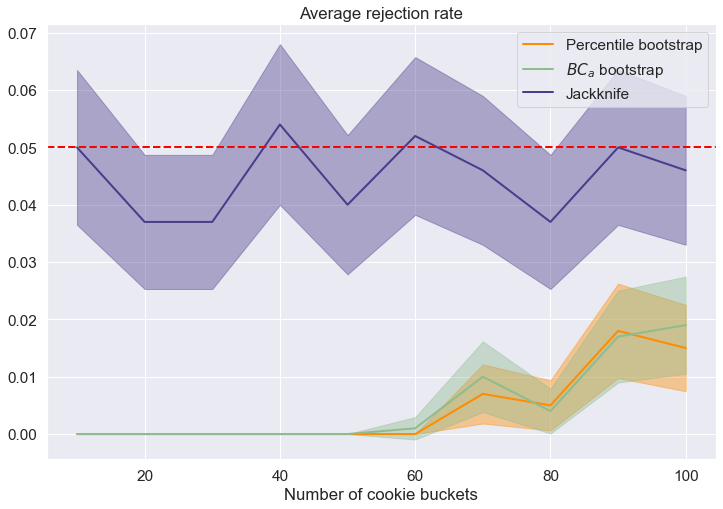

In [144]:
plt.plot(num_of_cookie_buckets, aver_one_cor_rej_rate_percentile_50, c='DarkOrange', label='Percentile bootstrap')
plt.plot(num_of_cookie_buckets, aver_one_cor_rej_rate_bca_50,  c='DarkSeaGreen', label='$BC_a$ bootstrap')
plt.plot(num_of_cookie_buckets, aver_one_cor_rej_rate_jack_50,c='darkslateblue', label='Jackknife')

plt.fill_between(num_of_cookie_buckets,aver_one_cor_rej_rate_percentile_50 - 1.96 * std_one_cor_rej_rate_percentile_50,
    aver_one_cor_rej_rate_percentile_50 + 1.96*std_one_cor_rej_rate_percentile_50, color='DarkOrange', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,aver_one_cor_rej_rate_bca_50 - 1.96 * std_one_cor_rej_rate_bca_50,
    aver_one_cor_rej_rate_bca_50 + 1.96*std_one_cor_rej_rate_bca_50, color='DarkSeaGreen', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,aver_one_cor_rej_rate_jack_50 - 1.96 * std_one_cor_rej_rate_jack_50,
    aver_one_cor_rej_rate_jack_50 + 1.96*std_one_cor_rej_rate_jack_50, color='darkslateblue', alpha=0.4)

plt.axhline(0.05, color='red', linestyle='dashed')
plt.title('Average rejection rate')
plt.xlabel('Number of cookie buckets')
plt.legend()


plt.savefig('arr_unpaired.pdf',bbox_inches='tight')
plt.show()

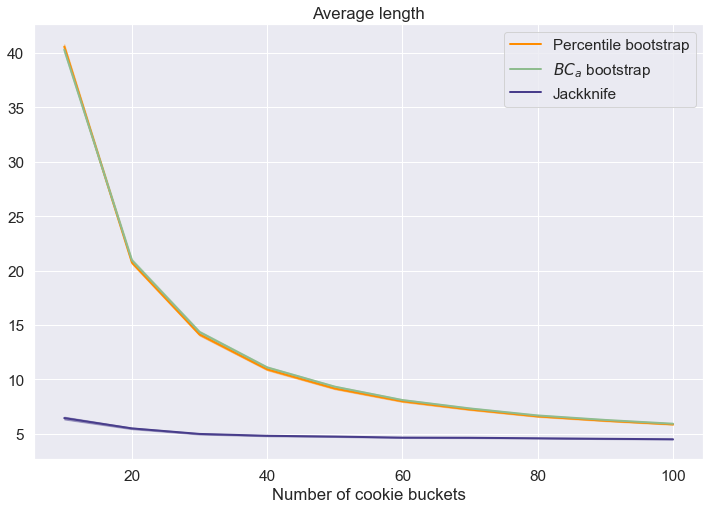

In [145]:
plt.plot(num_of_cookie_buckets, aver_one_cor_length_percentile_50, c='DarkOrange', label='Percentile bootstrap')
plt.plot(num_of_cookie_buckets, aver_one_cor_length_bca_50,  c='DarkSeaGreen', label='$BC_a$ bootstrap')
plt.plot(num_of_cookie_buckets, aver_one_cor_length_jack_50,c='darkslateblue', label='Jackknife')

plt.fill_between(num_of_cookie_buckets,aver_one_cor_length_percentile_50 - 1.96 * std_one_cor_length_percentile_50,
    aver_one_cor_length_percentile_50 + 1.96*std_one_cor_length_percentile_50, color='DarkOrange', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,aver_one_cor_length_bca_50 - 1.96 * std_one_cor_length_bca_50,
    aver_one_cor_length_bca_50 + 1.96*std_one_cor_length_bca_50, color='DarkSeaGreen', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,aver_one_cor_length_jack_50 - 1.96 * std_one_cor_length_jack_50,
    aver_one_cor_length_jack_50 + 1.96*std_one_cor_length_jack_50, color='darkslateblue', alpha=0.4)

plt.title('Average length')
plt.xlabel('Number of cookie buckets')
plt.legend()


plt.savefig('length_unpaired.pdf',bbox_inches='tight')
plt.show()

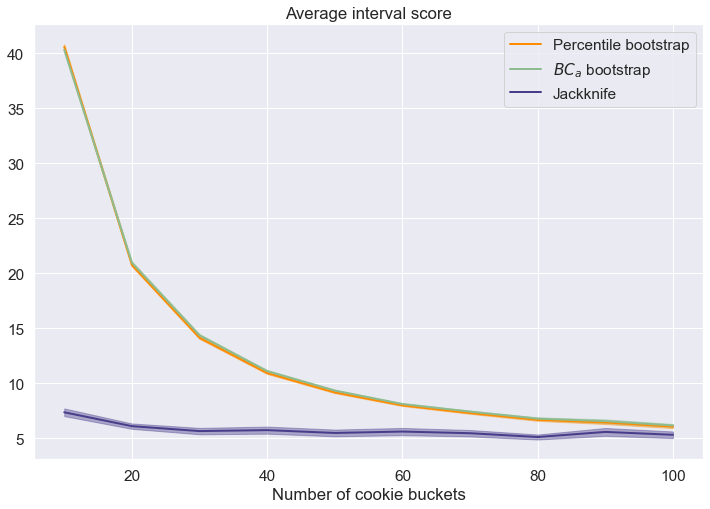

In [146]:
plt.plot(num_of_cookie_buckets, aver_one_cor_int_score_percentile_50, c='DarkOrange', label='Percentile bootstrap')
plt.plot(num_of_cookie_buckets, aver_one_cor_int_score_bca_50,  c='DarkSeaGreen', label='$BC_a$ bootstrap')
plt.plot(num_of_cookie_buckets, aver_one_cor_int_score_jack_50,c='darkslateblue', label='Jackknife')

plt.fill_between(num_of_cookie_buckets,aver_one_cor_int_score_percentile_50 - 1.96 * std_one_cor_int_score_percentile_50,
    aver_one_cor_int_score_percentile_50 + 1.96*std_one_cor_int_score_percentile_50, color='DarkOrange', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,aver_one_cor_int_score_bca_50 - 1.96 * std_one_cor_int_score_bca_50,
    aver_one_cor_int_score_bca_50 + 1.96*std_one_cor_int_score_bca_50, color='DarkSeaGreen', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,aver_one_cor_int_score_jack_50 - 1.96 * std_one_cor_int_score_jack_50,
    aver_one_cor_int_score_jack_50 + 1.96*std_one_cor_int_score_jack_50, color='darkslateblue', alpha=0.4)

plt.title('Average interval score')
plt.xlabel('Number of cookie buckets')
plt.legend()
plt.show()

### 95th percentile

In [42]:
one_cor_varying_res_percentile_95=list()
one_cor_varying_res_bc_a_95=list()
one_cor_varying_res_jack_95=list()

one_cor_varying_length_percentile_95=list()
one_cor_varying_length_bc_a_95=list()
one_cor_varying_length_jack_95=list()

one_cor_varying_int_score_percentile_95=list()
one_cor_varying_int_score_bc_a_95=list()
one_cor_varying_int_score_jack_95=list()

In [43]:
for cur_num_of_cookie_buckets in num_of_cookie_buckets:
    one_cor_varying_res_percentile_95+=[[]]
    one_cor_varying_res_bc_a_95+=[[]]
    one_cor_varying_res_jack_95+=[[]]

    one_cor_varying_length_percentile_95+=[[]]
    one_cor_varying_length_bc_a_95+=[[]]
    one_cor_varying_length_jack_95+=[[]]

    one_cor_varying_int_score_percentile_95+=[[]]
    one_cor_varying_int_score_bc_a_95+=[[]]
    one_cor_varying_int_score_jack_95+=[[]]


In [44]:
for i in range(num_of_sims):

    for cur_ind, cur_num_of_cookie_buckets in enumerate(num_of_cookie_buckets):
        # generate bucketed data
        dataset_treat, dataset_control=generate_data_single_corrupted_exp_bucket_level([1000,1000],[600,300],cur_num_of_cookie_buckets,bins_boundaries)

        # bin raw data and place the clients into cookie buckets
        bucketed_data_treat = pd.DataFrame(dataset_treat)
        bucketed_data_control = pd.DataFrame(dataset_control)

        res_percentile = percentile_bootstrap_ci_ratio_cookie_buckets(bucketed_data_treat, bucketed_data_control,
                                            bins_boundaries, 1000, 0.95,
                                            estimator_type='quantile',
                                            quantile=0.95, return_interval=True)

        res_bc_a = bc_a_bootstrap_ratio_cookie_buckets(bucketed_data_treat, bucketed_data_control,
                                            bins_boundaries, 1000, 0.95,
                                            estimator_type='quantile',
                                            quantile=0.95, return_interval=True)

        res_jack = jackknife_cookie_bucket_quantile_bucketed(bucketed_data_treat, bucketed_data_control,
                                            bins_boundaries, 0.95,
                                            quantile_to_test= 0.95, return_interval=True)

        # add coverage result
        one_cor_varying_res_percentile_95[cur_ind]+=[res_percentile[0]]
        one_cor_varying_res_bc_a_95[cur_ind]+=[res_bc_a[0]]
        one_cor_varying_res_jack_95[cur_ind]+=[res_jack[0]]

        #add length
        one_cor_varying_length_percentile_95[cur_ind]+=[res_percentile[1][1]-res_percentile[1][0]]
        one_cor_varying_length_bc_a_95[cur_ind]+=[res_bc_a[1][1]-res_bc_a[1][0]]
        one_cor_varying_length_jack_95[cur_ind]+=[res_jack[1][1]-res_jack[1][0]]

        #add scores
        one_cor_varying_int_score_percentile_95[cur_ind]+=[compute_interval_score(res_percentile[1][1],res_percentile[1][0],1-0.95,0)]
        one_cor_varying_int_score_bc_a_95[cur_ind]+=[compute_interval_score(res_bc_a[1][1],res_bc_a[1][0],1-0.95,0)]
        one_cor_varying_int_score_jack_95[cur_ind]+=[compute_interval_score(res_jack[1][1],res_jack[1][0],1-0.95,0)]



In [59]:
aver_one_cor_rej_rate_percentile_95 = np.array([np.mean(cur_sample) for cur_sample in one_cor_varying_res_percentile_95])
aver_one_cor_rej_rate_bca_95 = np.array([np.mean(cur_sample) for cur_sample in one_cor_varying_res_bc_a_95])
aver_one_cor_rej_rate_jack_95 = np.array([np.mean(cur_sample) for cur_sample in one_cor_varying_res_jack_95])

aver_one_cor_length_percentile_95 = np.array([np.mean(cur_sample) for cur_sample in one_cor_varying_length_percentile_95])
aver_one_cor_length_bca_95 = np.array([np.mean(cur_sample) for cur_sample in one_cor_varying_length_bc_a_95])
aver_one_cor_length_jack_95 = np.array([np.mean(cur_sample) for cur_sample in one_cor_varying_length_jack_95])

aver_one_cor_int_score_percentile_95 = np.array([np.mean(cur_sample) for cur_sample in one_cor_varying_int_score_percentile_95])
aver_one_cor_int_score_bca_95 = np.array([np.mean(cur_sample) for cur_sample in one_cor_varying_int_score_bc_a_95])
aver_one_cor_int_score_jack_95 = np.array([np.mean(cur_sample) for cur_sample in one_cor_varying_int_score_jack_95])


In [63]:
std_one_cor_rej_rate_percentile_95 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in one_cor_varying_res_percentile_95])
std_one_cor_rej_rate_bca_95 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in one_cor_varying_res_bc_a_95])
std_one_cor_rej_rate_jack_95 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in one_cor_varying_res_jack_95])

std_one_cor_length_percentile_95 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in one_cor_varying_length_percentile_95])
std_one_cor_length_bca_95 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in one_cor_varying_length_bc_a_95])
std_one_cor_length_jack_95 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in one_cor_varying_length_jack_95])

std_one_cor_int_score_percentile_95 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in one_cor_varying_int_score_percentile_95])
std_one_cor_int_score_bca_95 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in one_cor_varying_int_score_bc_a_95])
std_one_cor_int_score_jack_95 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in one_cor_varying_int_score_jack_95])


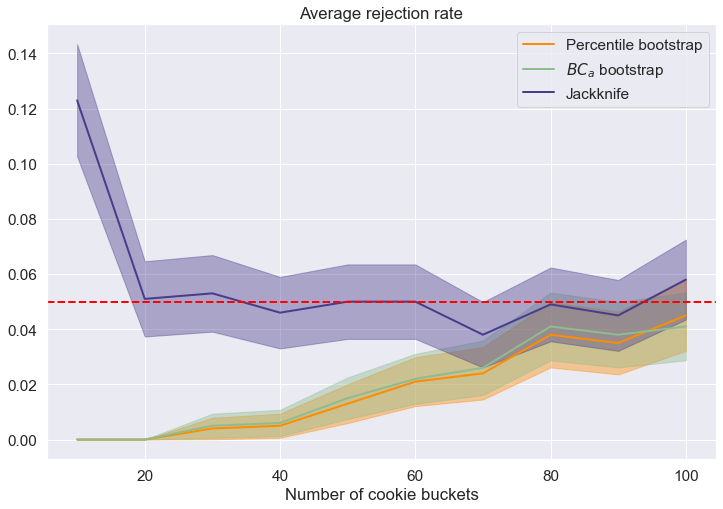

In [64]:
plt.plot(num_of_cookie_buckets, aver_one_cor_rej_rate_percentile_95, c='DarkOrange', label='Percentile bootstrap')
plt.plot(num_of_cookie_buckets, aver_one_cor_rej_rate_bca_95, c='DarkSeaGreen', label='$BC_a$ bootstrap')
plt.plot(num_of_cookie_buckets, aver_one_cor_rej_rate_jack_95, c='darkslateblue', label='Jackknife')

plt.fill_between(num_of_cookie_buckets,aver_one_cor_rej_rate_percentile_95 - 1.96 * std_one_cor_rej_rate_percentile_95,
    aver_one_cor_rej_rate_percentile_95 + 1.96*std_one_cor_rej_rate_percentile_95, color='DarkOrange', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,aver_one_cor_rej_rate_bca_95 - 1.96 * std_one_cor_rej_rate_bca_95,
    aver_one_cor_rej_rate_bca_95 + 1.96*std_one_cor_rej_rate_bca_95, color='DarkSeaGreen', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,aver_one_cor_rej_rate_jack_95 - 1.96 * std_one_cor_rej_rate_jack_95,
    aver_one_cor_rej_rate_jack_95 + 1.96*std_one_cor_rej_rate_jack_95, color='darkslateblue', alpha=0.4)

plt.axhline(0.05, color='red', linestyle='dashed')
plt.title('Average rejection rate')
plt.xlabel('Number of cookie buckets')
plt.legend()
plt.show()

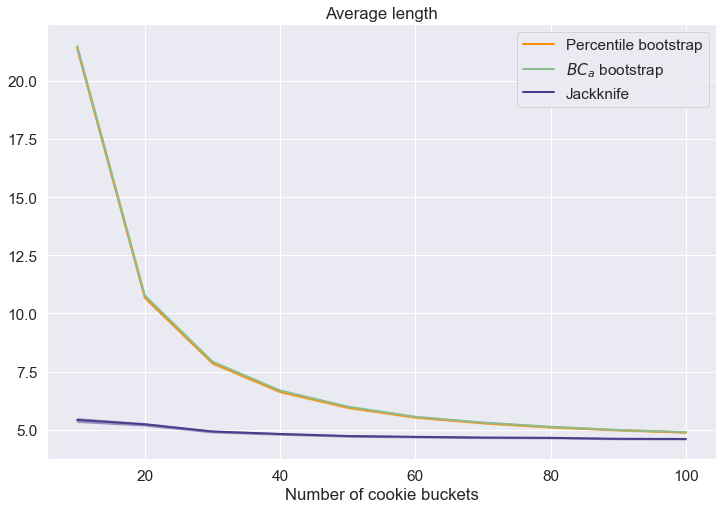

In [65]:
plt.plot(num_of_cookie_buckets, aver_one_cor_length_percentile_95, c='DarkOrange', label='Percentile bootstrap')
plt.plot(num_of_cookie_buckets, aver_one_cor_length_bca_95,  c='DarkSeaGreen', label='$BC_a$ bootstrap')
plt.plot(num_of_cookie_buckets, aver_one_cor_length_jack_95,c='darkslateblue', label='Jackknife')

plt.fill_between(num_of_cookie_buckets,aver_one_cor_length_percentile_95 - 1.96 * std_one_cor_length_percentile_95,
    aver_one_cor_length_percentile_95 + 1.96*std_one_cor_length_percentile_95, color='DarkOrange', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,aver_one_cor_length_bca_95 - 1.96 * std_one_cor_length_bca_95,
    aver_one_cor_length_bca_95 + 1.96*std_one_cor_length_bca_95, color='DarkSeaGreen', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,aver_one_cor_length_jack_95 - 1.96 * std_one_cor_length_jack_95,
    aver_one_cor_length_jack_95 + 1.96*std_one_cor_length_jack_95, color='darkslateblue', alpha=0.4)

plt.title('Average length')
plt.xlabel('Number of cookie buckets')
plt.legend()
plt.show()

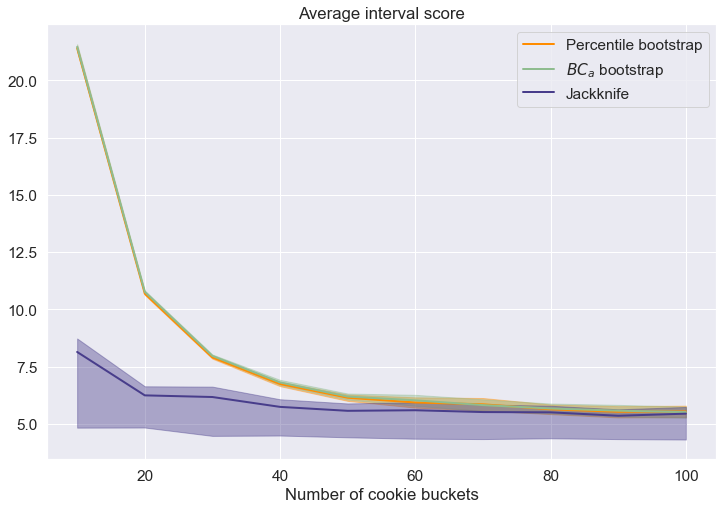

In [66]:
plt.plot(num_of_cookie_buckets, aver_one_cor_int_score_percentile_95, c='DarkOrange', label='Percentile bootstrap')
plt.plot(num_of_cookie_buckets, aver_one_cor_int_score_bca_95,  c='DarkSeaGreen', label='$BC_a$ bootstrap')
plt.plot(num_of_cookie_buckets, aver_one_cor_int_score_jack_95,c='darkslateblue', label='Jackknife')

plt.fill_between(num_of_cookie_buckets,aver_one_cor_int_score_percentile_95 - 1.96 * std_one_cor_int_score_percentile_95,
    aver_one_cor_int_score_percentile_95 + 1.96*std_one_cor_int_score_percentile_95, color='DarkOrange', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,aver_one_cor_int_score_bca_95 - 1.96 * std_one_cor_int_score_bca_95,
    aver_one_cor_int_score_bca_95 + 1.96*std_one_cor_int_score_bca_95, color='DarkSeaGreen', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,aver_one_cor_length_jack_95 - 1.96 * std_one_cor_int_score_jack_95,
    aver_one_cor_int_score_jack_95 + 1.96*std_one_cor_int_score_jack_95, color='darkslateblue', alpha=0.4)

plt.title('Average interval score')
plt.xlabel('Number of cookie buckets')
plt.legend()
plt.show()

### 99th percentile

In [67]:
one_cor_varying_res_percentile_99=list()
one_cor_varying_res_bc_a_99=list()
one_cor_varying_res_jack_99=list()

one_cor_varying_length_percentile_99=list()
one_cor_varying_length_bc_a_99=list()
one_cor_varying_length_jack_99=list()

one_cor_varying_int_score_percentile_99=list()
one_cor_varying_int_score_bc_a_99=list()
one_cor_varying_int_score_jack_99=list()

In [68]:
for cur_num_of_cookie_buckets in num_of_cookie_buckets:
    one_cor_varying_res_percentile_99 += [[]]
    one_cor_varying_res_bc_a_99 += [[]]
    one_cor_varying_res_jack_99 += [[]]

    one_cor_varying_length_percentile_99 += [[]]
    one_cor_varying_length_bc_a_99 += [[]]
    one_cor_varying_length_jack_99 += [[]]

    one_cor_varying_int_score_percentile_99 += [[]]
    one_cor_varying_int_score_bc_a_99 += [[]]
    one_cor_varying_int_score_jack_99 += [[]]


In [69]:
for i in range(num_of_sims):

    for cur_ind, cur_num_of_cookie_buckets in enumerate(num_of_cookie_buckets):
        # generate bucketed data
        dataset_treat, dataset_control=generate_data_single_corrupted_exp_bucket_level([1000,1000],[600,300],cur_num_of_cookie_buckets,bins_boundaries)

        # bin raw data and place the clients into cookie buckets
        bucketed_data_treat = pd.DataFrame(dataset_treat)
        bucketed_data_control = pd.DataFrame(dataset_control)

        res_percentile = percentile_bootstrap_ci_ratio_cookie_buckets(bucketed_data_treat, bucketed_data_control,
                                            bins_boundaries, 1000, 0.95,
                                            estimator_type='quantile',
                                            quantile=0.99, return_interval=True)

        res_bc_a = bc_a_bootstrap_ratio_cookie_buckets(bucketed_data_treat, bucketed_data_control,
                                            bins_boundaries, 1000, 0.95,
                                            estimator_type='quantile',
                                            quantile=0.99, return_interval=True)

        res_jack = jackknife_cookie_bucket_quantile_bucketed(bucketed_data_treat, bucketed_data_control,
                                            bins_boundaries, 0.95,
                                            quantile_to_test= 0.99, return_interval=True)

        # add coverage result
        one_cor_varying_res_percentile_99[cur_ind] += [res_percentile[0]]
        one_cor_varying_res_bc_a_99[cur_ind] += [res_bc_a[0]]
        one_cor_varying_res_jack_99[cur_ind] += [res_jack[0]]

        #add length
        one_cor_varying_length_percentile_99[cur_ind] += [res_percentile[1][1]-res_percentile[1][0]]
        one_cor_varying_length_bc_a_99[cur_ind] += [res_bc_a[1][1]-res_bc_a[1][0]]
        one_cor_varying_length_jack_99[cur_ind] += [res_jack[1][1]-res_jack[1][0]]

        #add scores
        one_cor_varying_int_score_percentile_99[cur_ind] += [compute_interval_score(res_percentile[1][1],res_percentile[1][0],1-0.95,0)]
        one_cor_varying_int_score_bc_a_99[cur_ind] += [compute_interval_score(res_bc_a[1][1],res_bc_a[1][0],1-0.95,0)]
        one_cor_varying_int_score_jack_99[cur_ind] += [compute_interval_score(res_jack[1][1],res_jack[1][0],1-0.95,0)]



In [70]:
aver_one_cor_rej_rate_percentile_99 = np.array([np.mean(cur_sample) for cur_sample in one_cor_varying_res_percentile_99])
aver_one_cor_rej_rate_bca_99 = np.array([np.mean(cur_sample) for cur_sample in one_cor_varying_res_bc_a_99])
aver_one_cor_rej_rate_jack_99 = np.array([np.mean(cur_sample) for cur_sample in one_cor_varying_res_jack_99])

aver_one_cor_length_percentile_99 = np.array([np.mean(cur_sample) for cur_sample in one_cor_varying_length_percentile_99])
aver_one_cor_length_bca_99 = np.array([np.mean(cur_sample) for cur_sample in one_cor_varying_length_bc_a_99])
aver_one_cor_length_jack_99 = np.array([np.mean(cur_sample) for cur_sample in one_cor_varying_length_jack_99])

aver_one_cor_int_score_percentile_99 = np.array([np.mean(cur_sample) for cur_sample in one_cor_varying_int_score_percentile_99])
aver_one_cor_int_score_bca_99 = np.array([np.mean(cur_sample) for cur_sample in one_cor_varying_int_score_bc_a_99])
aver_one_cor_int_score_jack_99 = np.array([np.mean(cur_sample) for cur_sample in one_cor_varying_int_score_jack_99])


In [71]:
std_one_cor_rej_rate_percentile_99 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in one_cor_varying_res_percentile_99])
std_one_cor_rej_rate_bca_99 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in one_cor_varying_res_bc_a_99])
std_one_cor_rej_rate_jack_99 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in one_cor_varying_res_jack_99])

std_one_cor_length_percentile_99 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in one_cor_varying_length_percentile_99])
std_one_cor_length_bca_99 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in one_cor_varying_length_bc_a_99])
std_one_cor_length_jack_99 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in one_cor_varying_length_jack_99])

std_one_cor_int_score_percentile_99 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in one_cor_varying_int_score_percentile_99])
std_one_cor_int_score_bca_99 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in one_cor_varying_int_score_bc_a_99])
std_one_cor_int_score_jack_99 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in one_cor_varying_int_score_jack_99])


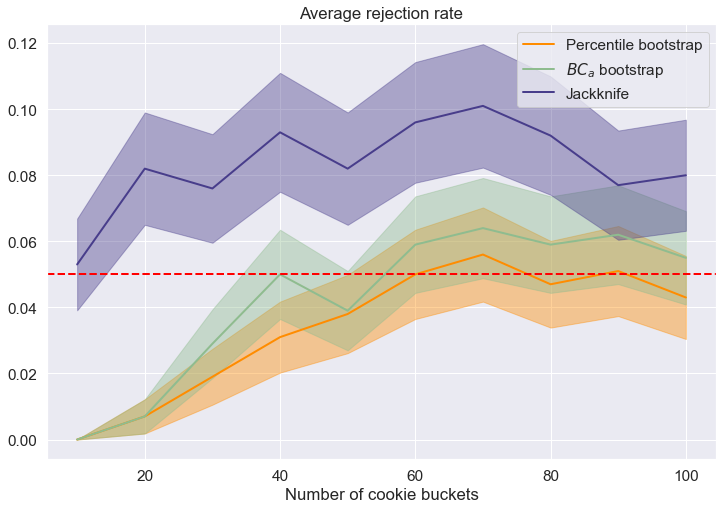

In [72]:
plt.plot(num_of_cookie_buckets, aver_one_cor_rej_rate_percentile_99, c='DarkOrange', label='Percentile bootstrap')
plt.plot(num_of_cookie_buckets, aver_one_cor_rej_rate_bca_99, c='DarkSeaGreen', label='$BC_a$ bootstrap')
plt.plot(num_of_cookie_buckets, aver_one_cor_rej_rate_jack_99, c='darkslateblue', label='Jackknife')

plt.fill_between(num_of_cookie_buckets,aver_one_cor_rej_rate_percentile_99 - 1.96 * std_one_cor_rej_rate_percentile_99,
    aver_one_cor_rej_rate_percentile_99 + 1.96*std_one_cor_rej_rate_percentile_99, color='DarkOrange', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,aver_one_cor_rej_rate_bca_99 - 1.96 * std_one_cor_rej_rate_bca_99,
    aver_one_cor_rej_rate_bca_99 + 1.96*std_one_cor_rej_rate_bca_99, color='DarkSeaGreen', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,aver_one_cor_rej_rate_jack_99 - 1.96 * std_one_cor_rej_rate_jack_99,
    aver_one_cor_rej_rate_jack_99 + 1.96*std_one_cor_rej_rate_jack_99, color='darkslateblue', alpha=0.4)

plt.axhline(0.05, color='red', linestyle='dashed')
plt.title('Average rejection rate')
plt.xlabel('Number of cookie buckets')
plt.legend()
plt.show()

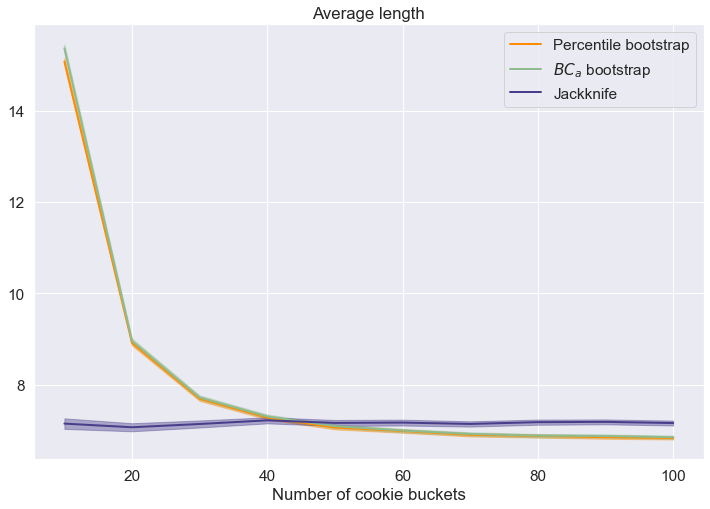

In [76]:
plt.plot(num_of_cookie_buckets, aver_one_cor_length_percentile_99, c='DarkOrange', label='Percentile bootstrap')
plt.plot(num_of_cookie_buckets, aver_one_cor_length_bca_99, c='DarkSeaGreen', label='$BC_a$ bootstrap')
plt.plot(num_of_cookie_buckets, aver_one_cor_length_jack_99, c='darkslateblue', label='Jackknife')

plt.fill_between(num_of_cookie_buckets,aver_one_cor_length_percentile_99 - 1.96 * std_one_cor_length_percentile_99,
    aver_one_cor_length_percentile_99 + 1.96*std_one_cor_length_percentile_99, color='DarkOrange', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,aver_one_cor_length_bca_99 - 1.96 * std_one_cor_length_bca_99,
    aver_one_cor_length_bca_99 + 1.96*std_one_cor_length_bca_99, color='DarkSeaGreen', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,aver_one_cor_length_jack_99 - 1.96 * std_one_cor_length_jack_99,
    aver_one_cor_length_jack_99 + 1.96*std_one_cor_length_jack_99, color='darkslateblue', alpha=0.4)

plt.title('Average length')
plt.xlabel('Number of cookie buckets')
plt.legend()
plt.show()

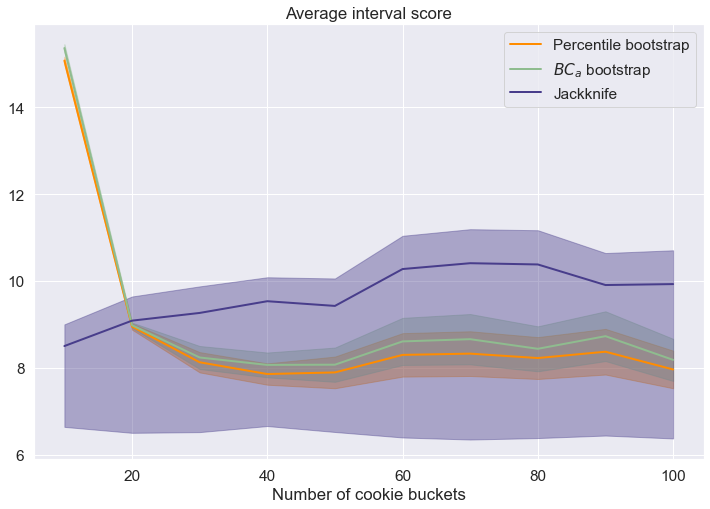

In [77]:
plt.plot(num_of_cookie_buckets, aver_one_cor_int_score_percentile_99, c='DarkOrange', label='Percentile bootstrap')
plt.plot(num_of_cookie_buckets, aver_one_cor_int_score_bca_99, c='DarkSeaGreen', label='$BC_a$ bootstrap')
plt.plot(num_of_cookie_buckets, aver_one_cor_int_score_jack_99, c='darkslateblue', label='Jackknife')

plt.fill_between(num_of_cookie_buckets,aver_one_cor_int_score_percentile_99 - 1.96 * std_one_cor_int_score_percentile_99,
    aver_one_cor_int_score_percentile_99 + 1.96*std_one_cor_int_score_percentile_99, color='DarkOrange', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,aver_one_cor_int_score_bca_99 - 1.96 * std_one_cor_int_score_bca_99,
    aver_one_cor_int_score_bca_99 + 1.96*std_one_cor_int_score_bca_99, color='DarkSeaGreen', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,aver_one_cor_length_jack_99 - 1.96 * std_one_cor_int_score_jack_99,
    aver_one_cor_int_score_jack_99 + 1.96*std_one_cor_int_score_jack_99, color='darkslateblue', alpha=0.4)

plt.title('Average interval score')
plt.xlabel('Number of cookie buckets')
plt.legend()
plt.show()

### Inverting the components

### Median

In [81]:
inv_one_cor_varying_res_percentile_50=list()
inv_one_cor_varying_res_bc_a_50=list()
inv_one_cor_varying_res_jack_50=list()

inv_one_cor_varying_length_percentile_50=list()
inv_one_cor_varying_length_bc_a_50=list()
inv_one_cor_varying_length_jack_50=list()

inv_one_cor_varying_int_score_percentile_50=list()
inv_one_cor_varying_int_score_bc_a_50=list()
inv_one_cor_varying_int_score_jack_50=list()

for cur_num_of_cookie_buckets in num_of_cookie_buckets:
    inv_one_cor_varying_res_percentile_50+=[[]]
    inv_one_cor_varying_res_bc_a_50+=[[]]
    inv_one_cor_varying_res_jack_50+=[[]]

    inv_one_cor_varying_length_percentile_50+=[[]]
    inv_one_cor_varying_length_bc_a_50+=[[]]
    inv_one_cor_varying_length_jack_50+=[[]]

    inv_one_cor_varying_int_score_percentile_50+=[[]]
    inv_one_cor_varying_int_score_bc_a_50+=[[]]
    inv_one_cor_varying_int_score_jack_50+=[[]]



In [82]:
for i in range(num_of_sims):

    for cur_ind, cur_num_of_cookie_buckets in enumerate(num_of_cookie_buckets):
        # generate bucketed data
        dataset_treat, dataset_control=generate_data_single_corrupted_exp_bucket_level([1000,1000],[500,1000],cur_num_of_cookie_buckets,bins_boundaries)

        # bin raw data and place the clients into cookie buckets
        bucketed_data_treat = pd.DataFrame(dataset_treat)
        bucketed_data_control = pd.DataFrame(dataset_control)

        res_percentile = percentile_bootstrap_ci_ratio_cookie_buckets(bucketed_data_treat, bucketed_data_control,
                                            bins_boundaries, 1000, 0.95,
                                            estimator_type='quantile',
                                            quantile=0.5, return_interval=True)

        res_bc_a = bc_a_bootstrap_ratio_cookie_buckets(bucketed_data_treat, bucketed_data_control,
                                            bins_boundaries, 1000, 0.95,
                                            estimator_type='quantile',
                                            quantile=0.5, return_interval=True)
        

        res_jack = jackknife_cookie_bucket_quantile_bucketed(bucketed_data_treat, bucketed_data_control,
                                            bins_boundaries, 0.95,
                                            quantile_to_test= 0.5, return_interval=True)

        # add coverage result
        inv_one_cor_varying_res_percentile_50[cur_ind]+=[res_percentile[0]]
        inv_one_cor_varying_res_bc_a_50[cur_ind]+=[res_bc_a[0]]
        inv_one_cor_varying_res_jack_50[cur_ind]+=[res_jack[0]]

        #add length
        inv_one_cor_varying_length_percentile_50[cur_ind]+=[res_percentile[1][1]-res_percentile[1][0]]
        inv_one_cor_varying_length_bc_a_50[cur_ind]+=[res_bc_a[1][1]-res_bc_a[1][0]]
        inv_one_cor_varying_length_jack_50[cur_ind]+=[res_jack[1][1]-res_jack[1][0]]

        #add scores
        inv_one_cor_varying_int_score_percentile_50[cur_ind]+=[compute_interval_score(res_percentile[1][1],res_percentile[1][0],1-0.95,0)]
        inv_one_cor_varying_int_score_bc_a_50[cur_ind]+=[compute_interval_score(res_bc_a[1][1],res_bc_a[1][0],1-0.95,0)]
        inv_one_cor_varying_int_score_jack_50[cur_ind]+=[compute_interval_score(res_jack[1][1],res_jack[1][0],1-0.95,0)]


In [83]:
inv_aver_one_cor_rej_rate_percentile_50 = np.array([np.mean(cur_sample) for cur_sample in inv_one_cor_varying_res_percentile_50])
inv_aver_one_cor_rej_rate_bca_50 = np.array([np.mean(cur_sample) for cur_sample in inv_one_cor_varying_res_bc_a_50])
inv_aver_one_cor_rej_rate_jack_50 = np.array([np.mean(cur_sample) for cur_sample in inv_one_cor_varying_res_jack_50])

inv_aver_one_cor_length_percentile_50 = np.array([np.mean(cur_sample) for cur_sample in inv_one_cor_varying_length_percentile_50])
inv_aver_one_cor_length_bca_50 = np.array([np.mean(cur_sample) for cur_sample in inv_one_cor_varying_length_bc_a_50])
inv_aver_one_cor_length_jack_50 = np.array([np.mean(cur_sample) for cur_sample in inv_one_cor_varying_length_jack_50])

inv_aver_one_cor_int_score_percentile_50 = np.array([np.mean(cur_sample) for cur_sample in inv_one_cor_varying_int_score_percentile_50])
inv_aver_one_cor_int_score_bca_50 = np.array([np.mean(cur_sample) for cur_sample in inv_one_cor_varying_int_score_bc_a_50])
inv_aver_one_cor_int_score_jack_50 = np.array([np.mean(cur_sample) for cur_sample in inv_one_cor_varying_int_score_jack_50])


inv_std_one_cor_rej_rate_percentile_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in inv_one_cor_varying_res_percentile_50])
inv_std_one_cor_rej_rate_bca_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in inv_one_cor_varying_res_bc_a_50])
inv_std_one_cor_rej_rate_jack_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in inv_one_cor_varying_res_jack_50])

inv_std_one_cor_length_percentile_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in inv_one_cor_varying_length_percentile_50])
inv_std_one_cor_length_bca_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in inv_one_cor_varying_length_bc_a_50])
inv_std_one_cor_length_jack_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in inv_one_cor_varying_length_jack_50])

inv_std_one_cor_int_score_percentile_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in inv_one_cor_varying_int_score_percentile_50])
inv_std_one_cor_int_score_bca_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in inv_one_cor_varying_int_score_bc_a_50])
inv_std_one_cor_int_score_jack_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in inv_one_cor_varying_int_score_jack_50])


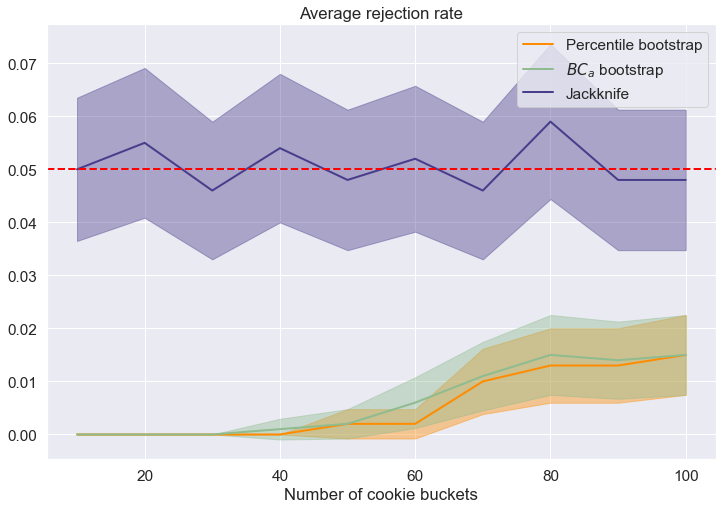

In [84]:
plt.plot(num_of_cookie_buckets, inv_aver_one_cor_rej_rate_percentile_50, c='DarkOrange', label='Percentile bootstrap')
plt.plot(num_of_cookie_buckets, inv_aver_one_cor_rej_rate_bca_50,  c='DarkSeaGreen', label='$BC_a$ bootstrap')
plt.plot(num_of_cookie_buckets, inv_aver_one_cor_rej_rate_jack_50,c='darkslateblue', label='Jackknife')

plt.fill_between(num_of_cookie_buckets,inv_aver_one_cor_rej_rate_percentile_50 - 1.96 * inv_std_one_cor_rej_rate_percentile_50,
    inv_aver_one_cor_rej_rate_percentile_50 + 1.96*inv_std_one_cor_rej_rate_percentile_50, color='DarkOrange', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,inv_aver_one_cor_rej_rate_bca_50 - 1.96 * inv_std_one_cor_rej_rate_bca_50,
    inv_aver_one_cor_rej_rate_bca_50 + 1.96*inv_std_one_cor_rej_rate_bca_50, color='DarkSeaGreen', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,inv_aver_one_cor_rej_rate_jack_50 - 1.96 * inv_std_one_cor_rej_rate_jack_50,
    inv_aver_one_cor_rej_rate_jack_50 + 1.96*inv_std_one_cor_rej_rate_jack_50, color='darkslateblue', alpha=0.4)

plt.axhline(0.05, color='red', linestyle='dashed')
plt.title('Average rejection rate')
plt.xlabel('Number of cookie buckets')
plt.legend()
plt.show()

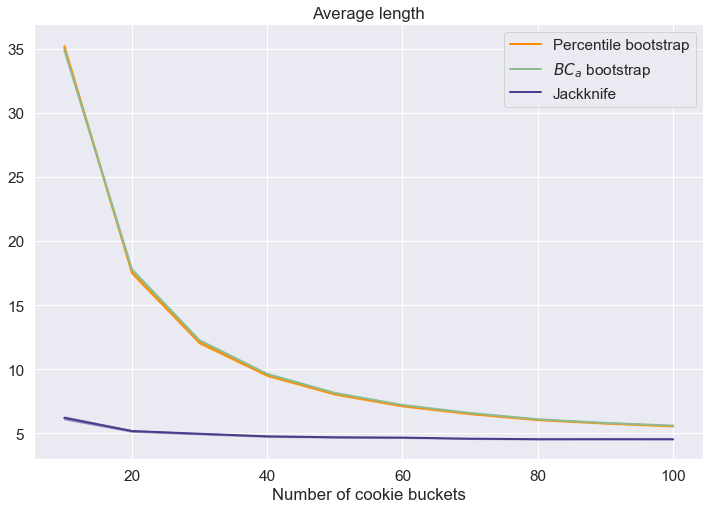

In [85]:
plt.plot(num_of_cookie_buckets, inv_aver_one_cor_length_percentile_50, c='DarkOrange', label='Percentile bootstrap')
plt.plot(num_of_cookie_buckets, inv_aver_one_cor_length_bca_50,  c='DarkSeaGreen', label='$BC_a$ bootstrap')
plt.plot(num_of_cookie_buckets, inv_aver_one_cor_length_jack_50,c='darkslateblue', label='Jackknife')

plt.fill_between(num_of_cookie_buckets,inv_aver_one_cor_length_percentile_50 - 1.96 * inv_std_one_cor_length_percentile_50,
    inv_aver_one_cor_length_percentile_50 + 1.96*inv_std_one_cor_length_percentile_50, color='DarkOrange', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,inv_aver_one_cor_length_bca_50 - 1.96 * inv_std_one_cor_length_bca_50,
    inv_aver_one_cor_length_bca_50 + 1.96*inv_std_one_cor_length_bca_50, color='DarkSeaGreen', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,inv_aver_one_cor_length_jack_50 - 1.96 * inv_std_one_cor_length_jack_50,
    inv_aver_one_cor_length_jack_50 + 1.96*inv_std_one_cor_length_jack_50, color='darkslateblue', alpha=0.4)

plt.title('Average length')
plt.xlabel('Number of cookie buckets')
plt.legend()
plt.show()

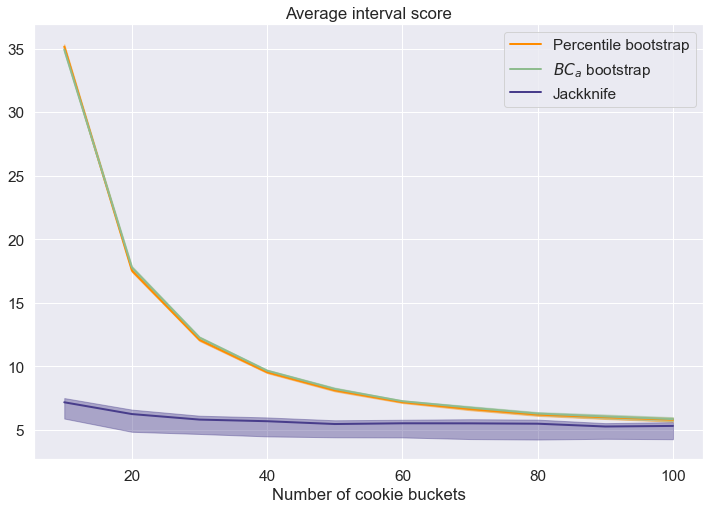

In [86]:
plt.plot(num_of_cookie_buckets, inv_aver_one_cor_int_score_percentile_50, c='DarkOrange', label='Percentile bootstrap')
plt.plot(num_of_cookie_buckets, inv_aver_one_cor_int_score_bca_50,  c='DarkSeaGreen', label='$BC_a$ bootstrap')
plt.plot(num_of_cookie_buckets, inv_aver_one_cor_int_score_jack_50,c='darkslateblue', label='Jackknife')

plt.fill_between(num_of_cookie_buckets,inv_aver_one_cor_int_score_percentile_50 - 1.96 * inv_std_one_cor_int_score_percentile_50,
    inv_aver_one_cor_int_score_percentile_50 + 1.96*inv_std_one_cor_int_score_percentile_50, color='DarkOrange', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,inv_aver_one_cor_int_score_bca_50 - 1.96 * inv_std_one_cor_int_score_bca_50,
    inv_aver_one_cor_int_score_bca_50 + 1.96*inv_std_one_cor_int_score_bca_50, color='DarkSeaGreen', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,inv_aver_one_cor_length_jack_50 - 1.96 * inv_std_one_cor_int_score_jack_50,
    inv_aver_one_cor_int_score_jack_50 + 1.96*inv_std_one_cor_int_score_jack_50, color='darkslateblue', alpha=0.4)

plt.title('Average interval score')
plt.xlabel('Number of cookie buckets')
plt.legend()
plt.show()

### 95th percentile

In [111]:
inv_one_cor_varying_res_percentile_95=list()
inv_one_cor_varying_res_bc_a_95=list()
inv_one_cor_varying_res_jack_95=list()

inv_one_cor_varying_length_percentile_95=list()
inv_one_cor_varying_length_bc_a_95=list()
inv_one_cor_varying_length_jack_95=list()

inv_one_cor_varying_int_score_percentile_95=list()
inv_one_cor_varying_int_score_bc_a_95=list()
inv_one_cor_varying_int_score_jack_95=list()

for cur_num_of_cookie_buckets in num_of_cookie_buckets:
    inv_one_cor_varying_res_percentile_95+=[[]]
    inv_one_cor_varying_res_bc_a_95+=[[]]
    inv_one_cor_varying_res_jack_95+=[[]]

    inv_one_cor_varying_length_percentile_95+=[[]]
    inv_one_cor_varying_length_bc_a_95+=[[]]
    inv_one_cor_varying_length_jack_95+=[[]]

    inv_one_cor_varying_int_score_percentile_95+=[[]]
    inv_one_cor_varying_int_score_bc_a_95+=[[]]
    inv_one_cor_varying_int_score_jack_95+=[[]]



In [112]:
for i in range(num_of_sims):

    for cur_ind, cur_num_of_cookie_buckets in enumerate(num_of_cookie_buckets):
        # generate bucketed data
        dataset_treat, dataset_control=generate_data_single_corrupted_exp_bucket_level([1000,1000],[300,600],cur_num_of_cookie_buckets,bins_boundaries)

        # bin raw data and place the clients into cookie buckets
        bucketed_data_treat = pd.DataFrame(dataset_treat)
        bucketed_data_control = pd.DataFrame(dataset_control)

        res_percentile = percentile_bootstrap_ci_ratio_cookie_buckets(bucketed_data_treat, bucketed_data_control,
                                            bins_boundaries, 1000, 0.95,
                                            estimator_type='quantile',
                                            quantile=0.95, return_interval=True)

        res_bc_a = bc_a_bootstrap_ratio_cookie_buckets(bucketed_data_treat, bucketed_data_control,
                                            bins_boundaries, 1000, 0.95,
                                            estimator_type='quantile',
                                            quantile=0.95, return_interval=True)
        

        res_jack = jackknife_cookie_bucket_quantile_bucketed(bucketed_data_treat, bucketed_data_control,
                                            bins_boundaries, 0.95,
                                            quantile_to_test= 0.95, return_interval=True)

        # add coverage result
        inv_one_cor_varying_res_percentile_95[cur_ind]+=[res_percentile[0]]
        inv_one_cor_varying_res_bc_a_95[cur_ind]+=[res_bc_a[0]]
        inv_one_cor_varying_res_jack_95[cur_ind]+=[res_jack[0]]

        #add length
        inv_one_cor_varying_length_percentile_95[cur_ind]+=[res_percentile[1][1]-res_percentile[1][0]]
        inv_one_cor_varying_length_bc_a_95[cur_ind]+=[res_bc_a[1][1]-res_bc_a[1][0]]
        inv_one_cor_varying_length_jack_95[cur_ind]+=[res_jack[1][1]-res_jack[1][0]]

        #add scores
        inv_one_cor_varying_int_score_percentile_95[cur_ind]+=[compute_interval_score(res_percentile[1][1],res_percentile[1][0],1-0.95,0)]
        inv_one_cor_varying_int_score_bc_a_95[cur_ind]+=[compute_interval_score(res_bc_a[1][1],res_bc_a[1][0],1-0.95,0)]
        inv_one_cor_varying_int_score_jack_95[cur_ind]+=[compute_interval_score(res_jack[1][1],res_jack[1][0],1-0.95,0)]


ValueError: A value in x_new is below the interpolation range.

In [123]:
res_bc_a = bc_a_bootstrap_ratio_cookie_buckets(bucketed_data_treat, bucketed_data_control,
                                            bins_boundaries, 1000, 0.95,
                                            estimator_type='quantile',
                                            quantile=0.95, return_interval=True)

In [124]:
res_bc_a

(False, [-12.510195567467969, 13.443312153572903])

In [ ]:
inv_aver_one_cor_rej_rate_percentile_95 = np.array([np.mean(cur_sample) for cur_sample in inv_one_cor_varying_res_percentile_95])
inv_aver_one_cor_rej_rate_bca_95 = np.array([np.mean(cur_sample) for cur_sample in inv_one_cor_varying_res_bc_a_95])
inv_aver_one_cor_rej_rate_jack_95 = np.array([np.mean(cur_sample) for cur_sample in inv_one_cor_varying_res_jack_95])

inv_aver_one_cor_length_percentile_95 = np.array([np.mean(cur_sample) for cur_sample in inv_one_cor_varying_length_percentile_95])
inv_aver_one_cor_length_bca_95 = np.array([np.mean(cur_sample) for cur_sample in inv_one_cor_varying_length_bc_a_95])
inv_aver_one_cor_length_jack_95 = np.array([np.mean(cur_sample) for cur_sample in inv_one_cor_varying_length_jack_95])

inv_aver_one_cor_int_score_percentile_95 = np.array([np.mean(cur_sample) for cur_sample in inv_one_cor_varying_int_score_percentile_95])
inv_aver_one_cor_int_score_bca_95 = np.array([np.mean(cur_sample) for cur_sample in inv_one_cor_varying_int_score_bc_a_95])
inv_aver_one_cor_int_score_jack_95 = np.array([np.mean(cur_sample) for cur_sample in inv_one_cor_varying_int_score_jack_95])


inv_std_one_cor_rej_rate_percentile_95 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in inv_one_cor_varying_res_percentile_95])
inv_std_one_cor_rej_rate_bca_95 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in inv_one_cor_varying_res_bc_a_95])
inv_std_one_cor_rej_rate_jack_95 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in inv_one_cor_varying_res_jack_95])

inv_std_one_cor_length_percentile_95 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in inv_one_cor_varying_length_percentile_95])
inv_std_one_cor_length_bca_95 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in inv_one_cor_varying_length_bc_a_95])
inv_std_one_cor_length_jack_95 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in inv_one_cor_varying_length_jack_95])

inv_std_one_cor_int_score_percentile_95 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in inv_one_cor_varying_int_score_percentile_95])
inv_std_one_cor_int_score_bca_95 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in inv_one_cor_varying_int_score_bc_a_95])
inv_std_one_cor_int_score_jack_95 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in inv_one_cor_varying_int_score_jack_95])


In [ ]:
plt.plot(num_of_cookie_buckets, inv_aver_one_cor_rej_rate_percentile_95, c='DarkOrange', label='Percentile bootstrap')
plt.plot(num_of_cookie_buckets, inv_aver_one_cor_rej_rate_bca_95,  c='DarkSeaGreen', label='$BC_a$ bootstrap')
plt.plot(num_of_cookie_buckets, inv_aver_one_cor_rej_rate_jack_95,c='darkslateblue', label='Jackknife')

plt.fill_between(num_of_cookie_buckets,inv_aver_one_cor_rej_rate_percentile_95 - 1.96 * inv_std_one_cor_rej_rate_percentile_95,
    inv_aver_one_cor_rej_rate_percentile_95 + 1.96*inv_std_one_cor_rej_rate_percentile_95, color='DarkOrange', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,inv_aver_one_cor_rej_rate_bca_95 - 1.96 * inv_std_one_cor_rej_rate_bca_95,
    inv_aver_one_cor_rej_rate_bca_95 + 1.96*inv_std_one_cor_rej_rate_bca_95, color='DarkSeaGreen', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,inv_aver_one_cor_rej_rate_jack_95 - 1.96 * inv_std_one_cor_rej_rate_jack_95,
    inv_aver_one_cor_rej_rate_jack_95 + 1.96*inv_std_one_cor_rej_rate_jack_95, color='darkslateblue', alpha=0.4)

plt.axhline(0.05, color='red', linestyle='dashed')
plt.title('Average rejection rate')
plt.xlabel('Number of cookie buckets')
plt.legend()
plt.show()

In [ ]:
plt.plot(num_of_cookie_buckets, inv_aver_one_cor_length_percentile_95, c='DarkOrange', label='Percentile bootstrap')
plt.plot(num_of_cookie_buckets, inv_aver_one_cor_length_bca_95,  c='DarkSeaGreen', label='$BC_a$ bootstrap')
plt.plot(num_of_cookie_buckets, inv_aver_one_cor_length_jack_95,c='darkslateblue', label='Jackknife')

plt.fill_between(num_of_cookie_buckets,inv_aver_one_cor_length_percentile_95 - 1.96 * inv_std_one_cor_length_percentile_95,
    inv_aver_one_cor_length_percentile_95 + 1.96*inv_std_one_cor_length_percentile_95, color='DarkOrange', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,inv_aver_one_cor_length_bca_95 - 1.96 * inv_std_one_cor_length_bca_95,
    inv_aver_one_cor_length_bca_95 + 1.96*inv_std_one_cor_length_bca_95, color='DarkSeaGreen', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,inv_aver_one_cor_length_jack_95 - 1.96 * inv_std_one_cor_length_jack_95,
    inv_aver_one_cor_length_jack_95 + 1.96*inv_std_one_cor_length_jack_95, color='darkslateblue', alpha=0.4)

plt.title('Average length')
plt.xlabel('Number of cookie buckets')
plt.legend()
plt.show()

In [ ]:
plt.plot(num_of_cookie_buckets, inv_aver_one_cor_int_score_percentile_95, c='DarkOrange', label='Percentile bootstrap')
plt.plot(num_of_cookie_buckets, inv_aver_one_cor_int_score_bca_95,  c='DarkSeaGreen', label='$BC_a$ bootstrap')
plt.plot(num_of_cookie_buckets, inv_aver_one_cor_int_score_jack_95,c='darkslateblue', label='Jackknife')

plt.fill_between(num_of_cookie_buckets,inv_aver_one_cor_int_score_percentile_95 - 1.96 * inv_std_one_cor_int_score_percentile_95,
    inv_aver_one_cor_int_score_percentile_95 + 1.96*inv_std_one_cor_int_score_percentile_95, color='DarkOrange', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,inv_aver_one_cor_int_score_bca_95 - 1.96 * inv_std_one_cor_int_score_bca_95,
    inv_aver_one_cor_int_score_bca_95 + 1.96*inv_std_one_cor_int_score_bca_95, color='DarkSeaGreen', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,inv_aver_one_cor_length_jack_95 - 1.96 * inv_std_one_cor_int_score_jack_95,
    inv_aver_one_cor_int_score_jack_95 + 1.96*inv_std_one_cor_int_score_jack_95, color='darkslateblue', alpha=0.4)

plt.title('Average interval score')
plt.xlabel('Number of cookie buckets')
plt.legend()
plt.show()

### 99th percentile

In [138]:
inv_one_cor_varying_res_percentile_99=list()
inv_one_cor_varying_res_bc_a_99=list()
inv_one_cor_varying_res_jack_99=list()

inv_one_cor_varying_length_percentile_99=list()
inv_one_cor_varying_length_bc_a_99=list()
inv_one_cor_varying_length_jack_99=list()

inv_one_cor_varying_int_score_percentile_99=list()
inv_one_cor_varying_int_score_bc_a_99=list()
inv_one_cor_varying_int_score_jack_99=list()

for cur_num_of_cookie_buckets in num_of_cookie_buckets:
    inv_one_cor_varying_res_percentile_99 += [[]]
    inv_one_cor_varying_res_bc_a_99 += [[]]
    inv_one_cor_varying_res_jack_99 += [[]]

    inv_one_cor_varying_length_percentile_99 += [[]]
    inv_one_cor_varying_length_bc_a_99 += [[]]
    inv_one_cor_varying_length_jack_99 += [[]]

    inv_one_cor_varying_int_score_percentile_99 += [[]]
    inv_one_cor_varying_int_score_bc_a_99 += [[]]
    inv_one_cor_varying_int_score_jack_99 += [[]]



In [139]:
for i in range(num_of_sims):

    for cur_ind, cur_num_of_cookie_buckets in enumerate(num_of_cookie_buckets):
        # generate bucketed data
        dataset_treat, dataset_control=generate_data_single_corrupted_exp_bucket_level([1000,1000],[500,1000],cur_num_of_cookie_buckets,bins_boundaries)

        # bin raw data and place the clients into cookie buckets
        bucketed_data_treat = pd.DataFrame(dataset_treat)
        bucketed_data_control = pd.DataFrame(dataset_control)

        res_percentile = percentile_bootstrap_ci_ratio_cookie_buckets(bucketed_data_treat, bucketed_data_control,
                                            bins_boundaries, 1000, 0.95,
                                            estimator_type='quantile',
                                            quantile=0.99, return_interval=True)

        # res_bc_a = bc_a_bootstrap_ratio_cookie_buckets(bucketed_data_treat, bucketed_data_control,
        #                                     bins_boundaries, 1000, 0.95,
        #                                     estimator_type='quantile',
        #                                     quantile=0.99, return_interval=True)
        

        res_jack = jackknife_cookie_bucket_quantile_bucketed(bucketed_data_treat, bucketed_data_control,
                                            bins_boundaries, 0.95,
                                            quantile_to_test= 0.99, return_interval=True)

        # add coverage result
        inv_one_cor_varying_res_percentile_99[cur_ind]+=[res_percentile[0]]
        # inv_one_cor_varying_res_bc_a_99[cur_ind]+=[res_bc_a[0]]
        inv_one_cor_varying_res_jack_99[cur_ind]+=[res_jack[0]]

        #add length
        inv_one_cor_varying_length_percentile_99[cur_ind]+=[res_percentile[1][1]-res_percentile[1][0]]
        # inv_one_cor_varying_length_bc_a_99[cur_ind]+=[res_bc_a[1][1]-res_bc_a[1][0]]
        inv_one_cor_varying_length_jack_99[cur_ind]+=[res_jack[1][1]-res_jack[1][0]]

        #add scores
        inv_one_cor_varying_int_score_percentile_99[cur_ind]+=[compute_interval_score(res_percentile[1][1],res_percentile[1][0],1-0.95,0)]
        # inv_one_cor_varying_int_score_bc_a_99[cur_ind]+=[compute_interval_score(res_bc_a[1][1],res_bc_a[1][0],1-0.95,0)]
        inv_one_cor_varying_int_score_jack_99[cur_ind]+=[compute_interval_score(res_jack[1][1],res_jack[1][0],1-0.95,0)]


In [140]:
inv_aver_one_cor_rej_rate_percentile_99 = np.array([np.mean(cur_sample) for cur_sample in inv_one_cor_varying_res_percentile_99])
# inv_aver_one_cor_rej_rate_bca_99 = np.array([np.mean(cur_sample) for cur_sample in inv_one_cor_varying_res_bc_a_99])
inv_aver_one_cor_rej_rate_jack_99 = np.array([np.mean(cur_sample) for cur_sample in inv_one_cor_varying_res_jack_99])

inv_aver_one_cor_length_percentile_99 = np.array([np.mean(cur_sample) for cur_sample in inv_one_cor_varying_length_percentile_99])
# inv_aver_one_cor_length_bca_99 = np.array([np.mean(cur_sample) for cur_sample in inv_one_cor_varying_length_bc_a_99])
inv_aver_one_cor_length_jack_99 = np.array([np.mean(cur_sample) for cur_sample in inv_one_cor_varying_length_jack_99])

inv_aver_one_cor_int_score_percentile_99 = np.array([np.mean(cur_sample) for cur_sample in inv_one_cor_varying_int_score_percentile_99])
# inv_aver_one_cor_int_score_bca_99 = np.array([np.mean(cur_sample) for cur_sample in inv_one_cor_varying_int_score_bc_a_99])
inv_aver_one_cor_int_score_jack_99 = np.array([np.mean(cur_sample) for cur_sample in inv_one_cor_varying_int_score_jack_99])


inv_std_one_cor_rej_rate_percentile_99 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in inv_one_cor_varying_res_percentile_99])
# inv_std_one_cor_rej_rate_bca_99 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in inv_one_cor_varying_res_bc_a_99])
inv_std_one_cor_rej_rate_jack_99 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in inv_one_cor_varying_res_jack_99])

inv_std_one_cor_length_percentile_99 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in inv_one_cor_varying_length_percentile_99])
# inv_std_one_cor_length_bca_99 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in inv_one_cor_varying_length_bc_a_99])
inv_std_one_cor_length_jack_99 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in inv_one_cor_varying_length_jack_99])

inv_std_one_cor_int_score_percentile_99 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in inv_one_cor_varying_int_score_percentile_99])
# inv_std_one_cor_int_score_bca_99 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in inv_one_cor_varying_int_score_bc_a_99])
inv_std_one_cor_int_score_jack_99 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in inv_one_cor_varying_int_score_jack_99])


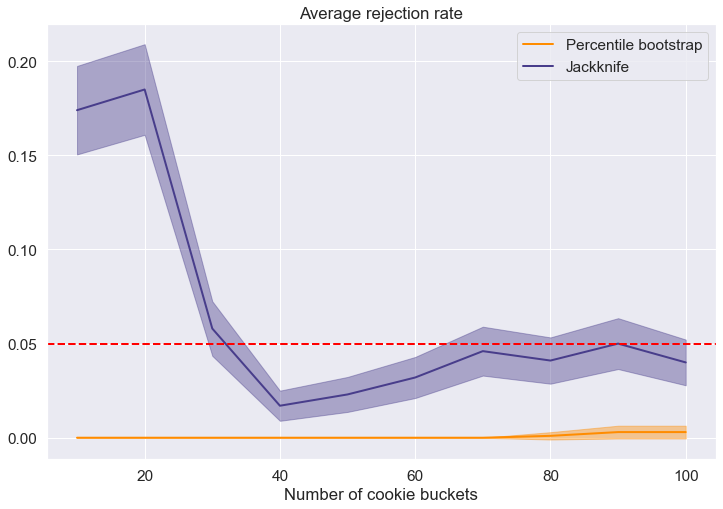

In [141]:
plt.plot(num_of_cookie_buckets, inv_aver_one_cor_rej_rate_percentile_99, c='DarkOrange', label='Percentile bootstrap')
# plt.plot(num_of_cookie_buckets, inv_aver_one_cor_rej_rate_bca_99,  c='DarkSeaGreen', label='$BC_a$ bootstrap')
plt.plot(num_of_cookie_buckets, inv_aver_one_cor_rej_rate_jack_99,c='darkslateblue', label='Jackknife')

plt.fill_between(num_of_cookie_buckets,inv_aver_one_cor_rej_rate_percentile_99 - 1.96 * inv_std_one_cor_rej_rate_percentile_99,
    inv_aver_one_cor_rej_rate_percentile_99 + 1.96*inv_std_one_cor_rej_rate_percentile_99, color='DarkOrange', alpha=0.4)

# plt.fill_between(num_of_cookie_buckets,inv_aver_one_cor_rej_rate_bca_99 - 1.96 * inv_std_one_cor_rej_rate_bca_99,
    # inv_aver_one_cor_rej_rate_bca_99 + 1.96*inv_std_one_cor_rej_rate_bca_99, color='DarkSeaGreen', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,inv_aver_one_cor_rej_rate_jack_99 - 1.96 * inv_std_one_cor_rej_rate_jack_99,
    inv_aver_one_cor_rej_rate_jack_99 + 1.96*inv_std_one_cor_rej_rate_jack_99, color='darkslateblue', alpha=0.4)

plt.axhline(0.05, color='red', linestyle='dashed')
plt.title('Average rejection rate')
plt.xlabel('Number of cookie buckets')
plt.legend()
plt.show()

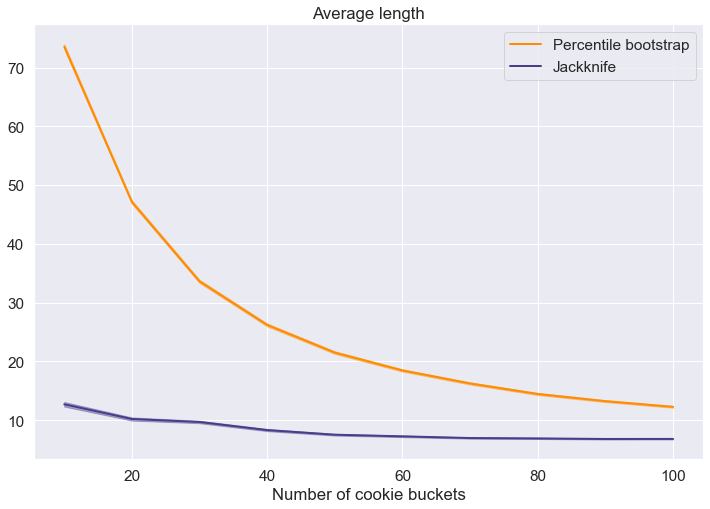

In [142]:
plt.plot(num_of_cookie_buckets, inv_aver_one_cor_length_percentile_99, c='DarkOrange', label='Percentile bootstrap')
# plt.plot(num_of_cookie_buckets, inv_aver_one_cor_length_bca_99, c='DarkSeaGreen', label='$BC_a$ bootstrap')
plt.plot(num_of_cookie_buckets, inv_aver_one_cor_length_jack_99,c='darkslateblue', label='Jackknife')

plt.fill_between(num_of_cookie_buckets,inv_aver_one_cor_length_percentile_99 - 1.96 * inv_std_one_cor_length_percentile_99,
    inv_aver_one_cor_length_percentile_99 + 1.96*inv_std_one_cor_length_percentile_99, color='DarkOrange', alpha=0.4)

# plt.fill_between(num_of_cookie_buckets,inv_aver_one_cor_length_bca_99 - 1.96 * inv_std_one_cor_length_bca_99,
    # inv_aver_one_cor_length_bca_99 + 1.96*inv_std_one_cor_length_bca_99, color='DarkSeaGreen', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,inv_aver_one_cor_length_jack_99 - 1.96 * inv_std_one_cor_length_jack_99,
    inv_aver_one_cor_length_jack_99 + 1.96*inv_std_one_cor_length_jack_99, color='darkslateblue', alpha=0.4)

plt.title('Average length')
plt.xlabel('Number of cookie buckets')
plt.legend()
plt.show()

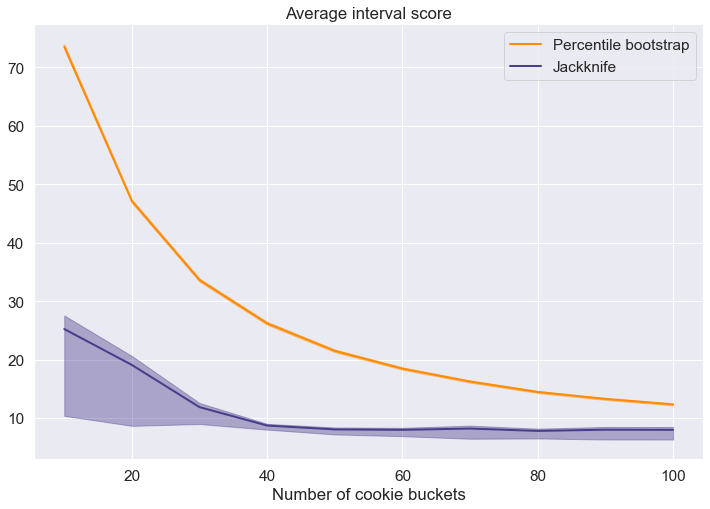

In [143]:
plt.plot(num_of_cookie_buckets, inv_aver_one_cor_int_score_percentile_99, c='DarkOrange', label='Percentile bootstrap')
# plt.plot(num_of_cookie_buckets, inv_aver_one_cor_int_score_bca_99,  c='DarkSeaGreen', label='$BC_a$ bootstrap')
plt.plot(num_of_cookie_buckets, inv_aver_one_cor_int_score_jack_99,c='darkslateblue', label='Jackknife')

plt.fill_between(num_of_cookie_buckets,inv_aver_one_cor_int_score_percentile_99 - 1.96 * inv_std_one_cor_int_score_percentile_99,
    inv_aver_one_cor_int_score_percentile_99 + 1.96*inv_std_one_cor_int_score_percentile_99, color='DarkOrange', alpha=0.4)

# plt.fill_between(num_of_cookie_buckets,inv_aver_one_cor_int_score_bca_99 - 1.96 * inv_std_one_cor_int_score_bca_99,
    # inv_aver_one_cor_int_score_bca_99 + 1.96*inv_std_one_cor_int_score_bca_99, color='DarkSeaGreen', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,inv_aver_one_cor_length_jack_99 - 1.96 * inv_std_one_cor_int_score_jack_99,
    inv_aver_one_cor_int_score_jack_99 + 1.96*inv_std_one_cor_int_score_jack_99, color='darkslateblue', alpha=0.4)

plt.title('Average interval score')
plt.xlabel('Number of cookie buckets')
plt.legend()
plt.show()